In [38]:
import tensorflow as tf
import numpy as np
from keras.datasets import imdb
from keras.utils.data_utils import pad_sequences
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense, RepeatVector, TimeDistributed, Dropout
from keras.layers import LSTM, Embedding, Dense, RepeatVector, TimeDistributed
import matplotlib.pyplot as plt
import random

In [39]:
# Pad Sequences
max_features = 10000  # Top 10,000 words
maxlen = 200  # First 200 words of each review

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [40]:
embedding_dim = 32
input_layer = Input(shape=(maxlen,))
embedding_layer = Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen)(input_layer)

encoded = LSTM(32, return_sequences=True, activation='tanh')(embedding_layer)
decoded = TimeDistributed(Dense(max_features, activation='softmax'))(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_5 (Embedding)     (None, 200, 32)           320000    
                                                                 
 lstm_7 (LSTM)               (None, 200, 32)           8320      
                                                                 
 time_distributed_4 (TimeDis  (None, 200, 10000)       330000    
 tributed)                                                       
                                                                 
Total params: 658,320
Trainable params: 658,320
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Train the model
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
313/313 [==============================] - 161s 514ms/step - loss: 6.1920 - val_loss: 5.0439
Epoch 2/50
313/313 [==============================] - 160s 513ms/step - loss: 4.7241 - val_loss: 4.5298
Epoch 3/50
313/313 [==============================] - 168s 536ms/step - loss: 4.3397 - val_loss: 4.1783
Epoch 4/50
313/313 [==============================] - 170s 545ms/step - loss: 3.9755 - val_loss: 3.8138
Epoch 5/50
313/313 [==============================] - 161s 514ms/step - loss: 3.6407 - val_loss: 3.4805
Epoch 6/50
313/313 [==============================] - 159s 507ms/step - loss: 3.2435 - val_loss: 3.0507
Epoch 7/50
313/313 [==============================] - 159s 510ms/step - loss: 2.8584 - val_loss: 2.7081
Epoch 8/50
313/313 [==============================] - 159s 509ms/step - loss: 2.5618 - val_loss: 2.4537
Epoch 9/50
313/313 [==============================] - 162s 518ms/step - loss: 2.3395 - val_loss: 2.2560
Epoch 10/50
313/313 [==============================] - 159s 508m

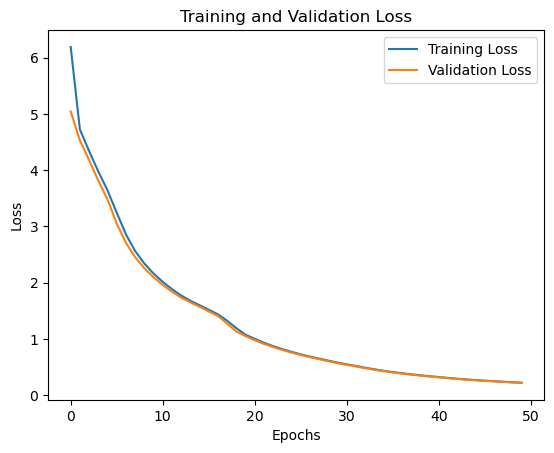

In [42]:
# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [44]:
# Evaluate model on a few random test samples
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(sequence):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in sequence if i >= 3])

# Select 5 random test samples
random.seed(123)
sample_indices = random.sample(range(len(X_test)), 5)

for i in sample_indices:
    original = decode_review(X_test[i])
    
    # Get model's predicted output (probabilities)
    reconstructed = autoencoder.predict(np.array([X_test[i]]))
    
    # Take argmax over the vocabulary dimension (axis=-1)
    reconstructed_seq = np.argmax(reconstructed, axis=-1)

    # Decode the predicted word indices
    reconstructed_text = decode_review(reconstructed_seq[0])
    
    print(f"Original: {original}")
    print(f"\nReconstructed: {reconstructed_text}\n")


1/1 [==============================] - 0s 13ms/step
Original: during the summer the cue line for this attraction is really long since it is a water ride it's very well themed but a lot of the seem to be out of order overall the ride is not worth it if you have to wait for almost 2 in line the drop at the end is exciting but the whole ride itself could have been better creators for indiana jones could have helped these hollywood also many times the ride breaks down and causes even longer waiting periods for others it's also very when they only have one raft open and not the two like they are supposed to during halloween horror nights you ride in the dark and it's exciting if it's your first time but if it's not then don't bother waiting in a four hour line

Reconstructed: during the summer the 'em line for this alas is really long since it is a water ride it's very well themed but a lot of the seem to be out of order top the ride is not worth it if you have to wait for almost 2 in line 